<a href="https://colab.research.google.com/github/karthikhub19/MachineLearningAlogs/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

## Classify cells to benign or malignant
>build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.

In [ ]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Visualize Data

> distribution of the classes based on Clump thickness and Uniformity of cell size

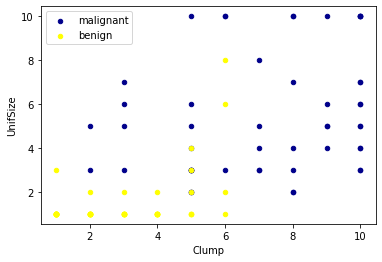

In [ ]:
ax = df[df['Class'] == 4][:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

## Pre-process Data

In [ ]:
# look at columns data types
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

>BareNuc column includes some values that are not numerical
- drop non-numerical values

In [ ]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### Define Feature Matrix 

In [ ]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

### Define Target Variable

In [ ]:
df['Class'] = df['Class'].astype('int')
y = np.asarray(df['Class'])
y [:5]

array([2, 2, 2, 2, 2])

## Split Dataset into Train and Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


## Model

>Kernelling
- mapping data into a higher dimensional space 

>Kernel function
- The mathematical function used for the transformation

>Kernel function types:
1. Linear
2. Polynomial
3. Radial basis function (RBF)
4. Sigmoid

>usually choose different functions in turn and compare the results.

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(X_train, y_train) 

SVC()

## Predict

In [ ]:
yhat = clf.predict(X_test)
yhat[:5]

array([2, 4, 2, 4, 2])

## Evaluate

### Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
clf.score(X_test, y_test)

0.9635036496350365

A confusion matrix helps us gain an insight into how correct our predictions were and how they hold up against the actual values.

In [ ]:

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,2,4,All
Actual,,,
2,85,5,90
4,0,47,47
All,85,52,137


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In the simplest terms, Precision is the ratio between the True Positives and all the Positives
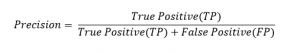

The recall is the measure of our model correctly identifying True Positives. 
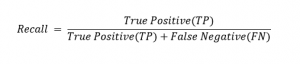

nstead of balancing precision and recall, we can just aim for a good F1-score and that would be indicative of a good Precision and a good Recall value as well.
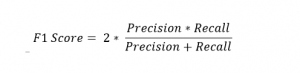

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


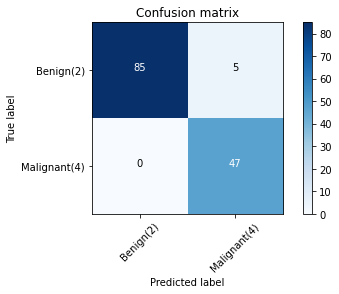

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

#using different SVM kernels

In [ ]:
## Requried Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

## Load iris dataset
iris = datasets.load_iris()

## Create features and target data
X = iris.data[:, :2]
y = iris.target

## Plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

Text(0.5, 1.0, 'Support Vector Classifier with linear kernel')

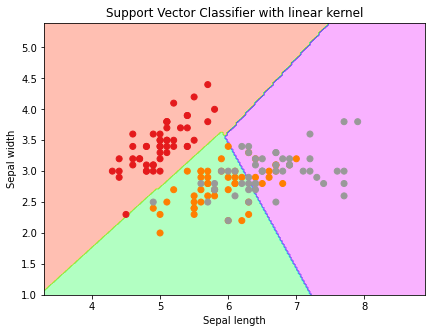

In [ ]:
## Creating the linear kernel
C = 1.0
svc_classifier = svm.SVC(kernel='linear', C=C).fit(X, y)

Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

## Code of plotting
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.set_cmap("gist_rainbow") 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with linear kernel')

[]

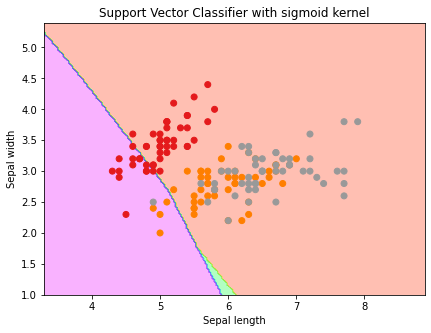

In [ ]:
## Sigmoid kernel
svc_classifier = svm.SVC(kernel='sigmoid', C=C).fit(X, y)
C = 1.0
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

## Code for plotting
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.set_cmap("gist_rainbow") 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with sigmoid kernel')
plt.plot()

[]

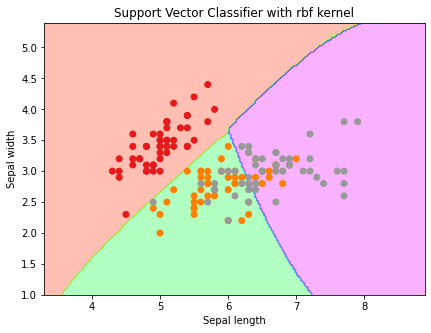

In [ ]:
## rbf kernel
svc_classifier = svm.SVC(kernel='rbf', C=C).fit(X, y)
C=1.0
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

## Code for creating plots
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.set_cmap("gist_rainbow") 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with rbf kernel')
plt.plot()

[]

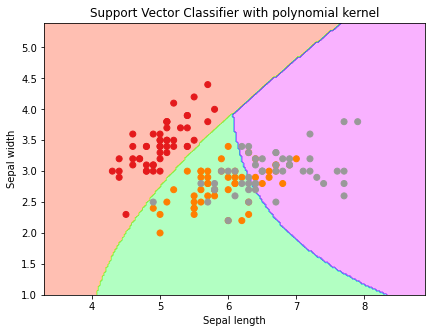

In [ ]:
## Polynomial kernel
svc_classifier = svm.SVC(kernel='poly', C=C).fit(X, y)
C = 1.0
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

## Code for creating the graph
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.set_cmap("gist_rainbow") 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with polynomial kernel')
plt.plot()